# Business Problem
## The task is to predict for 1000 customers who were contacted during the current campaign, whether they will buy car insurance or not.
### We will be using logistic Regression to predict it.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
insurance_data=pd.read_csv('carInsurance_train.csv')
insurance_test=pd.read_csv('carInsurance_test.csv')

In [124]:
insurance_data.shape

(4000, 19)

In [125]:
insurance_test.shape

(1000, 19)

In [126]:
insurance_data.head()


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


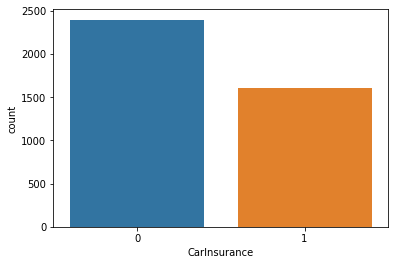

In [127]:
sns.countplot('CarInsurance',data=insurance_data)

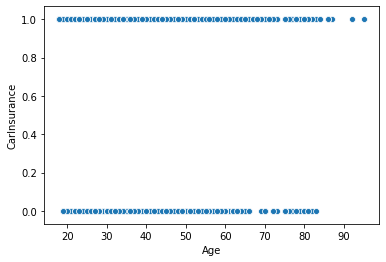

In [128]:
sns.scatterplot('Age','CarInsurance',data=insurance_data)

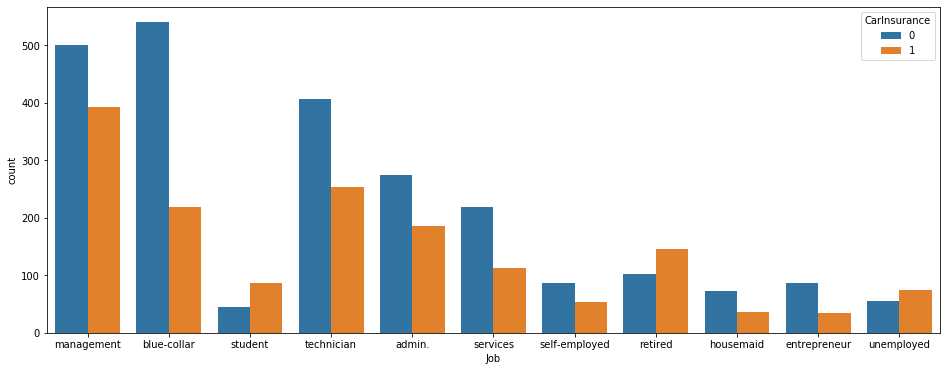

In [129]:
plt.figure(figsize=(16,6))
sns.countplot(x='Job',hue='CarInsurance',data=insurance_data)

In [130]:
insurance_data.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

C:\Users\Rohit Charaya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rohit Charaya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


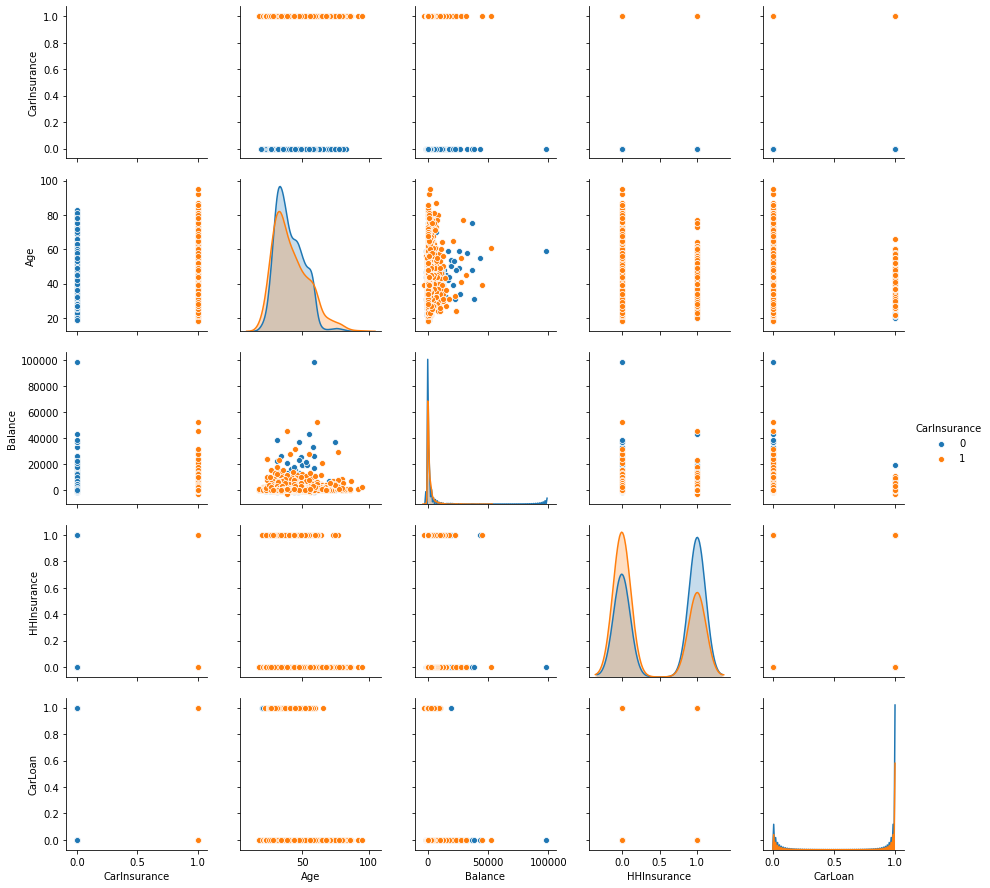

In [131]:
cols=['CarInsurance','Age','Balance','HHInsurance','CarLoan']
sns.pairplot(insurance_data[cols],hue='CarInsurance')

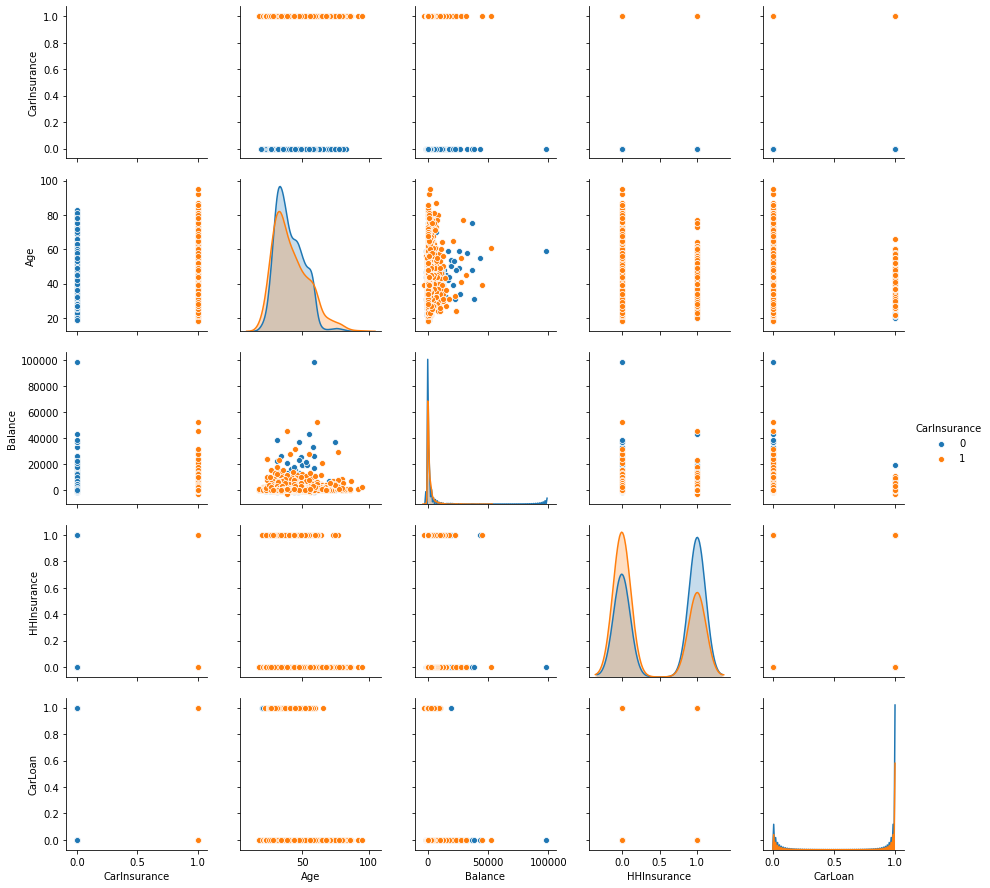

In [132]:
sns.pairplot(insurance_data[cols],hue='CarInsurance')

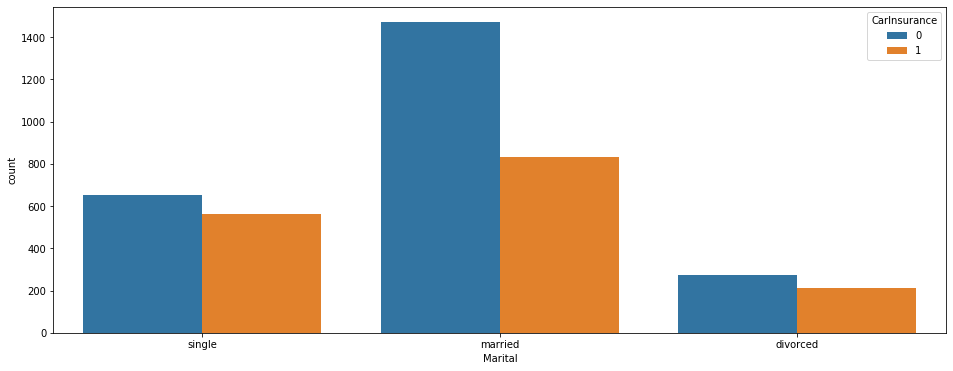

In [133]:
plt.figure(figsize=(16,6))
sns.countplot(x='Marital',hue='CarInsurance',data=insurance_data)

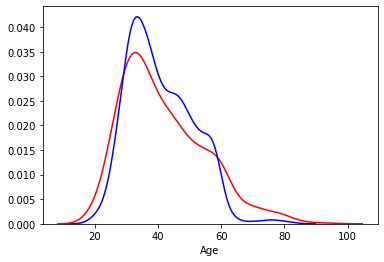

In [134]:
sns.distplot(insurance_data['Age'][insurance_data['CarInsurance']==1],hist=False,color='red')
sns.distplot(insurance_data['Age'][insurance_data['CarInsurance']==0],hist=False,color='blue')

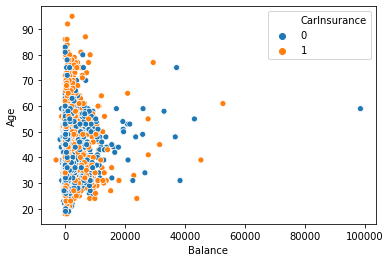

In [135]:
sns.scatterplot(hue='CarInsurance',y='Age',x='Balance',data=insurance_data)

In [136]:
insurance_data.drop(insurance_data[insurance_data['Balance']>60000].index,axis=0,inplace=True)

## Missing values

In [137]:
## merge the two files for removing the missing values and later on we will split the merged file 
## we are giving the rows name in two dataset so that we can easily split the data 
merge_data=pd.concat([insurance_data,insurance_test],keys=('train','test'))

In [138]:
merge_data

Id  Age          Job  Marital  Education  Default  Balance  \
train 0       1   32   management   single   tertiary        0     1218   
      1       2   32  blue-collar  married    primary        0     1156   
      2       3   29   management   single   tertiary        0      637   
      3       4   25      student   single    primary        0      373   
      4       5   30   management  married   tertiary        0     2694   
...         ...  ...          ...      ...        ...      ...      ...   
test  995  4996   31       admin.   single  secondary        0      131   
      996  4997   52   management  married   tertiary        0     2635   
      997  4998   46   technician  married   tertiary        0     3009   
      998  4999   60      retired  married  secondary        0     7038   
      999  5000   28   management   single   tertiary        0      957   

           HHInsurance  CarLoan Communication  LastContactDay  \
train 0              1        0     telephone              28   
      1              1        0           NaN              26   
      2              1        0      cellular               3   
      3              1        0      cellular              11   
      4              0        0      cellular               3   
...                ...      ...           ...             ...   
test  995            1        0      cellular              15   
      996            0        0      cellular               6   
      997            0        0      cellular               4   
      998            0        0     telephone               7   
      999            0        0      cellular              25   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  \
train 0                jan             2          -1             0      NaN   
      1                may             5          -1             0      NaN   
      2                jun             1         119             1  failure   
      3                may             2          -1             0      NaN   
      4                jun             1          -1             0      NaN   
...                    ...           ...         ...           ...      ...   
test  995              jun             1          -1             0      NaN   
      996              sep             1         108             8  success   
      997              aug             2          -1             0      NaN   
      998              oct             4          -1             0      NaN   
      999              may             2          -1             0      NaN   

          CallStart   CallEnd  CarInsurance  
train 0    13:45:20  13:46:30           0.0  
      1    14:49:03  14:52:08           0.0  
      2    16:30:24  16:36:04           1.0  
      3    12:06:43  12:20:22           1.0  
      4    14:35:44  14:38:56           0.0  
...             ...       ...           ...  
test  995  13:54:24  13:56:55           NaN  
      996  13:13:38  13:18:51           NaN  
      997  10:23:35  10:24:33           NaN  
      998  17:01:49  17:04:07           NaN  
      999  12:15:19  12:30:34           NaN  

[4999 rows x 19 columns]

In [139]:
merge_data.drop(['Id','CallStart','CallEnd'],axis=1,inplace=True)

In [140]:
merge_data.isnull().sum().sort_values(ascending=False)

Outcome             3798
Communication       1123
CarInsurance        1000
Education            216
Job                   24
PrevAttempts           0
DaysPassed             0
NoOfContacts           0
LastContactMonth       0
LastContactDay         0
CarLoan                0
HHInsurance            0
Balance                0
Default                0
Marital                0
Age                    0
dtype: int64

In [141]:
## created a copy of merged data so that we avoid human error while working 
merge_data_df=merge_data.copy()

In [142]:
merge_data_df[merge_data_df['Outcome'].isnull()].describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.0,3798.0,3041.000000
mean,41.172722,0.016588,1414.180358,0.496051,0.140864,16.059768,2.798315,-1.0,0.0,0.343637
std,11.275358,0.127737,3032.231216,0.500050,0.347927,8.442643,3.292817,0.0,0.0,0.475000
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.0,0.0,0.000000
25%,32.000000,0.000000,83.000000,0.000000,0.000000,8.000000,1.000000,-1.0,0.0,0.000000
50%,39.000000,0.000000,482.500000,0.000000,0.000000,16.500000,2.000000,-1.0,0.0,0.000000
75%,49.000000,0.000000,1505.500000,1.000000,0.000000,22.000000,3.000000,-1.0,0.0,1.000000
max,95.000000,1.000000,45248.000000,1.000000,1.000000,31.000000,43.000000,-1.0,0.0,1.000000


In [143]:
merge_data_df['Outcome'].fillna("NoPrevContact",inplace=True)

In [144]:
merge_data_df['Outcome'].isnull().sum()

0

In [145]:
merge_data_df[merge_data_df['Communication'].isnull()].describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,902.000000
mean,40.501336,0.018700,1165.617097,0.706144,0.143366,15.596616,2.688335,1.700801,0.020481,0.186253
std,9.502357,0.135523,2634.372948,0.455730,0.350602,8.496422,3.022335,39.179002,0.385255,0.389526
min,20.000000,0.000000,-1547.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,66.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,419.000000,1.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1219.000000,1.000000,0.000000,23.000000,3.000000,-1.000000,0.000000,0.000000
max,61.000000,1.000000,45248.000000,1.000000,1.000000,31.000000,41.000000,779.000000,12.000000,1.000000


In [146]:
merge_data_df['Communication'].value_counts()

cellular     3529
telephone     347
Name: Communication, dtype: int64

In [147]:
merge_data_df['Communication'].fillna('cellular',inplace=True)

In [148]:
merge_data_df['Communication'].isnull().sum()

0

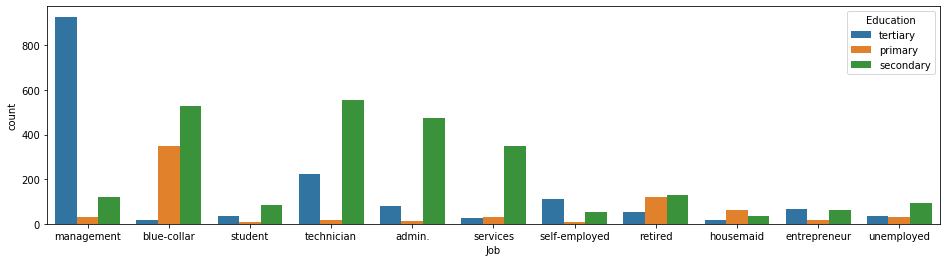

In [149]:
## fiiling missing values in educatio by its relation with job variable
plt.figure(figsize=(16,4))
sns.countplot(x='Job',hue='Education',data=merge_data_df)

In [150]:
edu_map=merge_data_df.groupby('Job')['Education'].describe()['top']

In [151]:
edu_map

Job
admin.           secondary
blue-collar      secondary
entrepreneur      tertiary
housemaid          primary
management        tertiary
retired          secondary
self-employed     tertiary
services         secondary
student          secondary
technician       secondary
unemployed       secondary
Name: top, dtype: object

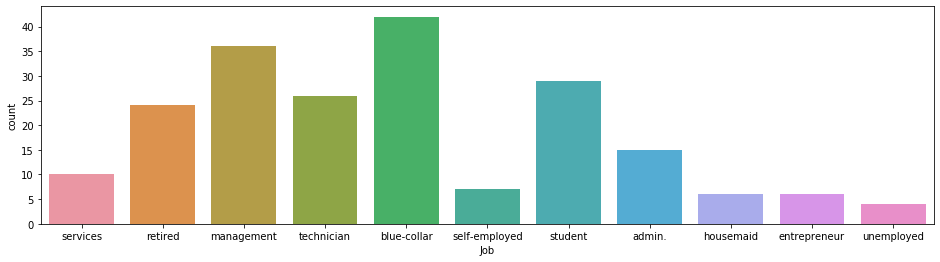

In [152]:
plt.figure(figsize=(16,4))
sns.countplot(x='Job',data=merge_data_df[merge_data_df['Education'].isnull()])

In [153]:
job_type=merge_data_df['Job'].value_counts().index

In [154]:
job_type

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')

In [155]:
 for j in job_type:
    merge_data_df.loc[(merge_data_df['Education'].isnull()) & (merge_data_df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

In [156]:
merge_data_df['Education'].isnull().sum()

11

In [157]:
merge_data_df.isnull().sum()

Age                    0
Job                   24
Marital                0
Education             11
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication          0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome                0
CarInsurance        1000
dtype: int64

In [158]:
merge_data_df.dropna(inplace=True)

In [159]:
merge_data_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CarInsurance        0
dtype: int64

### Seperate out the numerical data

In [160]:
numeric_cols = merge_data_df.select_dtypes(include=[np.number]).columns

In [161]:
numeric_cols

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance'],
      dtype='object')

In [162]:
merge_data_df_num = merge_data_df[numeric_cols]

In [163]:
categorical_cols = merge_data_df.select_dtypes(include=['object']).columns

In [164]:
categorical_cols

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome'],
      dtype='object')

In [165]:
merge_data_df_cat = merge_data_df[categorical_cols]

In [166]:
merge_data_df_cat_dummies = pd.get_dummies(merge_data_df_cat)

In [167]:
insurance_data_combined = pd.concat([merge_data_df_num,merge_data_df_cat_dummies],axis=1)

In [168]:
insurance_data_combined.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0   32        0     1218            1        0              28   
      1   32        0     1156            1        0              26   
      2   29        0      637            1        0               3   
      3   25        0      373            1        0              11   
      4   30        0     2694            0        0               3   

         NoOfContacts  DaysPassed  PrevAttempts  CarInsurance  ...  \
train 0             2          -1             0           0.0  ...   
      1             5          -1             0           0.0  ...   
      2             1         119             1           1.0  ...   
      3             2          -1             0           1.0  ...   
      4             1          -1             0           0.0  ...   

         LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 0                     0                     0                     0   
      1                     0                     0                     1   
      2                     1                     0                     0   
      3                     0                     0                     1   
      4                     1                     0                     0   

         LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 0                     0                     0                     0   
      1                     0                     0                     0   
      2                     0                     0                     0   
      3                     0                     0                     0   
      4                     0                     0                     0   

         Outcome_NoPrevContact  Outcome_failure  Outcome_other  \
train 0                      1                0              0   
      1                      1                0              0   
      2                      0                1              0   
      3                      1                0              0   
      4                      1                0              0   

         Outcome_success  
train 0                0  
      1                0  
      2                0  
      3                0  
      4                0  

[5 rows x 45 columns]

In [169]:
data = insurance_data_combined.loc[['train'],::]

In [170]:
data.shape

(3980, 45)

In [171]:
X = data.drop(columns='CarInsurance')

In [172]:
Y = data['CarInsurance']

In [173]:
X.shape

(3980, 44)

In [174]:
Y.shape

(3980,)

In [175]:
from sklearn.model_selection import train_test_split

In [190]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=100)

In [191]:
X_test

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 1219   31        0     1664            1        0              20   
      3044   25        0     2311            0        1              21   
      709    38        0        0            1        0              26   
      3703   56        0      784            0        1              30   
      2579   58        0      565            0        0               8   
...         ...      ...      ...          ...      ...             ...   
      2320   58        0     2160            1        1               5   
      1153   51        0      684            1        0              20   
      1666   36        0        0            1        0               8   
      3926   46        0       57            0        0              28   
      1480   44        0     1074            1        0              11   

            NoOfContacts  DaysPassed  PrevAttempts  Job_admin.  ...  \
train 1219             1         182             1           0  ...   
      3044             2          -1             0           0  ...   
      709             38          -1             0           0  ...   
      3703             2          -1             0           0  ...   
      2579             1          93             1           0  ...   
...                  ...         ...           ...         ...  ...   
      2320             1          -1             0           1  ...   
      1153             1          -1             0           1  ...   
      1666             1         368             1           0  ...   
      3926             1          -1             0           0  ...   
      1480             2          -1             0           1  ...   

            LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 1219                     0                     0                     0   
      3044                     0                     0                     0   
      709                      0                     0                     0   
      3703                     0                     0                     0   
      2579                     0                     0                     0   
...                          ...                   ...                   ...   
      2320                     0                     0                     1   
      1153                     0                     0                     0   
      1666                     0                     0                     1   
      3926                     0                     0                     1   
      1480                     0                     0                     0   

            LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 1219                     0                     0                     0   
      3044                     0                     0                     0   
      709                      0                     0                     0   
      3703                     0                     0                     0   
      2579                     0                     1                     0   
...                          ...                   ...                   ...   
      2320                     0                     0                     0   
      1153                     1                     0                     0   
      1666                     0                     0                     0   
      3926                     0                     0                     0   
      1480                     0                     0                     0   

            Outcome_NoPrevContact  Outcome_failure  Outcome_other  \
train 1219                      0                0              0   
      3044                      1                0              0   
      709                       1                0              0   
      3703                      1                0          

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
lr=LogisticRegression()

In [194]:
lr.fit(X_train,Y_train)

C:\Users\Rohit Charaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
Y_pred=lr.predict(X_test)

In [196]:
Y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [197]:
from sklearn.metrics import accuracy_score 

In [198]:
accuracy=accuracy_score(Y_test,Y_pred)

In [199]:
accuracy

0.6892797319932998

In [ ]:
## Other measures to look apart from accuracy and confusion matrix 

In [204]:
from sklearn.metrics import precision_score
precision_score(Y_test,Y_pred)
## Measure the ability of the clasifier not to label as positive a sample that is negative.
# Precesion = TP/(TP+FP)

0.7430555555555556

In [ ]:
from sklearn.metrics import recall_score
recall_score(Y_test,Y_pred)
# recall =TP/(TP/FN)
# measures the proportion of positives that are correctly predicted 

In [200]:
from sklearn.metrics import f1_score

In [201]:
f1_score(Y_test,Y_pred)
# F1 score = 2*Precesion*Recall/(Prescesion+Recall)
best F1 score is 1 and worst is 0

0.5356695869837297

## ROC CURVE

In [206]:
# Area under the curve 
from sklearn.metrics import roc_auc_score

In [210]:
roc_auc=roc_auc_score(Y_test,lr.predict_proba(X_test)[:,1])

plotting the ROC curve

In [212]:
from sklearn.metrics import roc_curve

In [213]:
fpr,tpr,thresholds=roc_curve(Y_test,lr.predict_proba(X_test)[:,1])

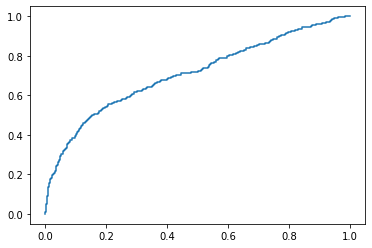

In [214]:
plt.plot(fpr,tpr)

In [215]:
# hard predictions 
Y_pred=lr.predict(X_test)
Y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [216]:
# exact probabilities of positive class
# soft predictions 
lr.predict_proba(X_test)[:,1]

array([0.83562641, 0.32006995, 0.05142573, ..., 0.20802447, 0.28460804,
       0.25728312])

In [226]:
# change the threshold value 
threshold=0.6

Y_pred=(lr.predict_proba(X_test)[:,1]>threshold).astype(int)

In [227]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[638,  45],
       [346, 165]], dtype=int64)

In [224]:
accuracy_score(Y_test,Y_pred)

0.6725293132328308

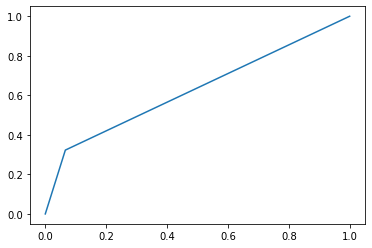

In [225]:
fpr,tpr,thresholds=roc_curve(Y_test,lr.predict_proba(X_test)[:,1]>threshold)
plt.plot(fpr,tpr)

In [ ]:
# if we change the threshold value then roc curve wont change 